In [1]:
import seaborn as sns
sns.set_theme(style="whitegrid")
import pandas as pd
import sys
import os
import glob
import numpy as np

path = '../AMLSim/outputs/10K'
csvList = sorted(glob.glob('../AMLSim/outputs/10K/*.csv'))
print(csvList)


['../AMLSim/outputs/10K/accountMapping.csv', '../AMLSim/outputs/10K/accounts.csv', '../AMLSim/outputs/10K/alert_accounts.csv', '../AMLSim/outputs/10K/alert_transactions.csv', '../AMLSim/outputs/10K/cash_tx.csv', '../AMLSim/outputs/10K/individuals-bulkload.csv', '../AMLSim/outputs/10K/organizations-bulkload.csv', '../AMLSim/outputs/10K/resolvedentities.csv', '../AMLSim/outputs/10K/sar_accounts.csv', '../AMLSim/outputs/10K/transactions.csv']


In [2]:
df = pd.read_csv(csvList[0])


In [3]:
# df.bank_id.unique()


In [4]:
pd.read_csv(csvList[1]).columns

Index(['acct_id', 'dsply_nm', 'type', 'acct_stat', 'acct_rptng_crncy',
       'prior_sar_count', 'branch_id', 'open_dt', 'close_dt',
       'initial_deposit', 'tx_behavior_id', 'bank_id', 'first_name',
       'last_name', 'street_addr', 'city', 'state', 'country', 'zip', 'gender',
       'birth_date', 'ssn', 'lon', 'lat'],
      dtype='object')

In [5]:
accountMapping = pd.read_csv(csvList[8])
accountMapping.head()

,ALERT_ID,MAIN_ACCOUNT_ID,MAIN_CUSTOMER_ID,EVENT_DATE,ALERT_TYPE,ACCOUNT_TYPE,IS_SAR
0,0,7781,C_7781,20170121,cycle,INDIVIDUAL,YES
1,1,4915,C_4915,20170212,cycle,INDIVIDUAL,YES
2,2,3745,C_3745,20170110,cycle,INDIVIDUAL,YES
3,3,8296,C_8296,20170105,fan_in,INDIVIDUAL,YES
4,4,5233,C_5233,20170217,cycle,INDIVIDUAL,YES


In [6]:
accounts = pd.read_csv(csvList[1])
accounts.head()


,acct_id,dsply_nm,type,acct_stat,acct_rptng_crncy,prior_sar_count,branch_id,open_dt,close_dt,initial_deposit,...,street_addr,city,state,country,zip,gender,birth_date,ssn,lon,lat
0,0,C_0,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,92221.09,...,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
1,1,C_1,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,87897.72,...,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
2,2,C_2,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,71028.58,...,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
3,3,C_3,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,62945.84,...,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
4,4,C_4,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,75563.74,...,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
transactions = pd.read_csv(csvList[-1])
transactions.head()

,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id
0,1,2910,559,TRANSFER,915.43,2017-01-01T00:00:00Z,False,-1
1,2,7248,9998,TRANSFER,719.60,2017-01-01T00:00:00Z,False,-1
2,3,5900,8152,TRANSFER,931.53,2017-01-01T00:00:00Z,False,-1
3,4,1033,1655,TRANSFER,483.24,2017-01-01T00:00:00Z,False,-1
4,5,8122,8810,TRANSFER,504.92,2017-01-01T00:00:00Z,False,-1


False    88109
True       705
Name: is_sar, dtype: int64


Text(0.5, 1.0, 'Data Imbalance')

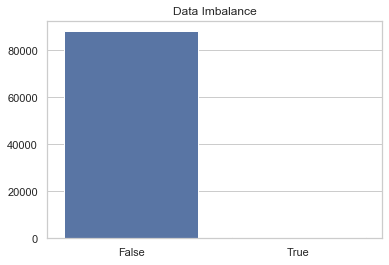

In [8]:
x = transactions['is_sar'].value_counts().index
y = transactions['is_sar'].value_counts().values
print(transactions['is_sar'].value_counts())
ax = sns.barplot(x=x, y=y)
ax.set_title('Data Imbalance')


   tran_id  orig_acct  bene_acct   tx_type  base_amt        tran_timestamp  \
0        1       2910        559  TRANSFER    915.43  2017-01-01T00:00:00Z   
1        2       7248       9998  TRANSFER    719.60  2017-01-01T00:00:00Z   
2        3       5900       8152  TRANSFER    931.53  2017-01-01T00:00:00Z   
3        4       1033       1655  TRANSFER    483.24  2017-01-01T00:00:00Z   
4        5       8122       8810  TRANSFER    504.92  2017-01-01T00:00:00Z   

   is_sar  alert_id  
0   False        -1  
1   False        -1  
2   False        -1  
3   False        -1  
4   False        -1  


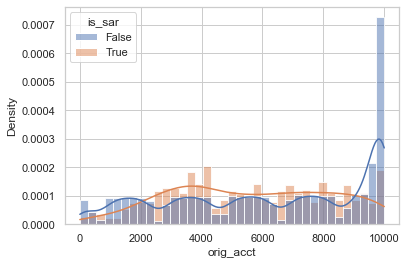

In [9]:
print(transactions.head())
sns.histplot(data=transactions, x='orig_acct', hue='is_sar',
             stat='density', common_norm=False, kde=True)


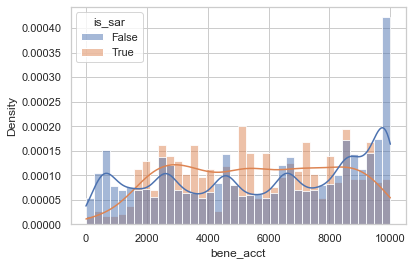

In [10]:

sns.histplot(data=transactions, x='bene_acct', hue='is_sar',
             stat='density', common_norm=False, kde=True)

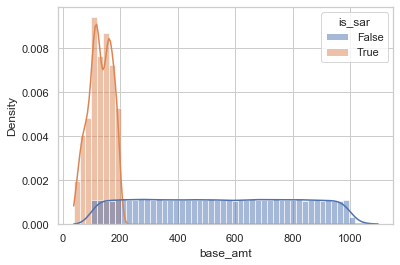

In [11]:
sns.histplot(data=transactions, x='base_amt', hue='is_sar',
             stat='density', common_norm=False, kde=True)


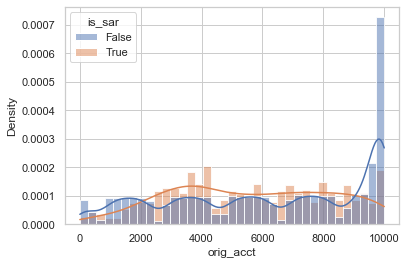

In [12]:

sns.histplot(data=transactions, x='orig_acct', hue='is_sar',
             stat='density', common_norm=False, kde=True)


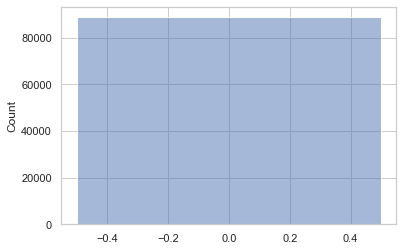

In [13]:
tx_type = pd.Categorical(transactions['tx_type'])
sns.histplot(data=tx_type.codes, kde = True)


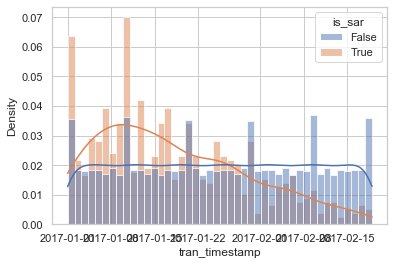

In [14]:
transactions['tran_timestamp'] = pd.to_datetime(transactions['tran_timestamp'])
sns.histplot(data=transactions, x='tran_timestamp', hue='is_sar',
            stat='density', common_norm=False, kde=True)


In [15]:
orig_acct = pd.merge(transactions, accounts, how='left', left_on=['orig_acct'], right_on=['acct_id'])
pd.set_option('display.max_columns', None)
orig_acct.head()


,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id,acct_id,dsply_nm,type,acct_stat,acct_rptng_crncy,prior_sar_count,branch_id,open_dt,close_dt,initial_deposit,tx_behavior_id,bank_id,first_name,last_name,street_addr,city,state,country,zip,gender,birth_date,ssn,lon,lat
0,1,2910,559,TRANSFER,915.43,2017-01-01 00:00:00+00:00,False,-1,2910,C_2910,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,94491.80,3,bank_1,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
1,2,7248,9998,TRANSFER,719.60,2017-01-01 00:00:00+00:00,False,-1,7248,C_7248,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,70399.39,4,bank_3,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5900,8152,TRANSFER,931.53,2017-01-01 00:00:00+00:00,False,-1,5900,C_5900,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,62874.51,5,bank_3,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1033,1655,TRANSFER,483.24,2017-01-01 00:00:00+00:00,False,-1,1033,C_1033,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,96185.16,3,bank_0,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
4,5,8122,8810,TRANSFER,504.92,2017-01-01 00:00:00+00:00,False,-1,8122,C_8122,SAV,A,USD,True,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,86650.03,1,bank_4,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
accounts

,acct_id,dsply_nm,type,acct_stat,acct_rptng_crncy,prior_sar_count,branch_id,open_dt,close_dt,initial_deposit,tx_behavior_id,bank_id,first_name,last_name,street_addr,city,state,country,zip,gender,birth_date,ssn,lon,lat
0,0,C_0,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,92221.09,1,bank_0,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
1,1,C_1,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,87897.72,1,bank_0,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
2,2,C_2,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,71028.58,1,bank_0,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
3,3,C_3,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,62945.84,1,bank_0,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
4,4,C_4,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,75563.74,1,bank_0,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,C_9995,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,98588.57,5,bank_4,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
9996,9996,C_9996,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,86243.84,5,bank_4,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
9997,9997,C_9997,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,65212.40,5,bank_4,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
9998,9998,C_9998,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,80948.44,5,bank_4,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN


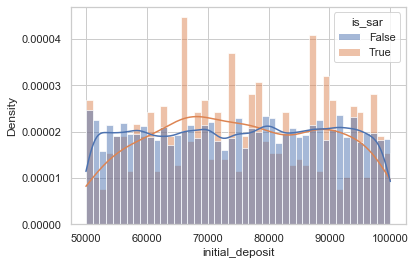

In [17]:


sns.histplot(data=orig_acct, x='initial_deposit', hue='is_sar',
            stat='density', common_norm=False, kde=True)



0        1969
1        6416
2        5072
3          38
4        7351
         ... 
88809    3929
88810    3909
88811    2418
88812    2977
88813    7053
Length: 88814, dtype: int16


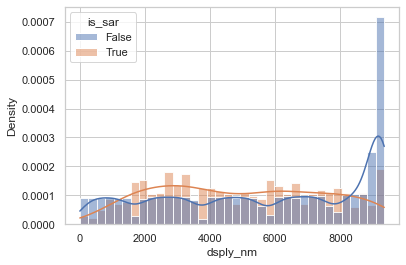

In [18]:
orig_acct['dsply_nm'] = orig_acct.dsply_nm.astype('category')
print(orig_acct['dsply_nm'].cat.codes)
orig_acct['dsply_nm'] = orig_acct['dsply_nm'].cat.codes
sns.histplot(data=orig_acct, x='dsply_nm', hue='is_sar',
             stat='density', common_norm=False, kde=True)


In [19]:
bene_acct = pd.merge(transactions, accounts, how='left',
                     left_on=['bene_acct'], right_on=['acct_id'])
pd.set_option('display.max_columns', None)
bene_acct.head()


,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id,acct_id,dsply_nm,type,acct_stat,acct_rptng_crncy,prior_sar_count,branch_id,open_dt,close_dt,initial_deposit,tx_behavior_id,bank_id,first_name,last_name,street_addr,city,state,country,zip,gender,birth_date,ssn,lon,lat
0,1,2910,559,TRANSFER,915.43,2017-01-01 00:00:00+00:00,False,-1,559,C_559,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,70861.27,2,bank_0,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
1,2,7248,9998,TRANSFER,719.60,2017-01-01 00:00:00+00:00,False,-1,9998,C_9998,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,80948.44,5,bank_4,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5900,8152,TRANSFER,931.53,2017-01-01 00:00:00+00:00,False,-1,8152,C_8152,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,73134.05,1,bank_4,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1033,1655,TRANSFER,483.24,2017-01-01 00:00:00+00:00,False,-1,1655,C_1655,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,83710.20,5,bank_0,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
4,5,8122,8810,TRANSFER,504.92,2017-01-01 00:00:00+00:00,False,-1,8810,C_8810,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,60575.95,3,bank_4,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
bene_acct = pd.merge(transactions, accounts, how='left',
                     left_on=['orig_acct'], right_on=['acct_id'])
pd.set_option('display.max_columns', None)
bene_acct.tail()


,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id,acct_id,dsply_nm,type,acct_stat,acct_rptng_crncy,prior_sar_count,branch_id,open_dt,close_dt,initial_deposit,tx_behavior_id,bank_id,first_name,last_name,street_addr,city,state,country,zip,gender,birth_date,ssn,lon,lat
88809,88810,4821,1468,TRANSFER,984.33,2017-02-19 00:00:00+00:00,False,-1,4821,C_4821,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,79755.76,3,bank_2,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
88810,88811,4802,2757,TRANSFER,645.74,2017-02-19 00:00:00+00:00,False,-1,4802,C_4802,SAV,A,USD,True,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,82242.83,3,bank_2,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
88811,88812,3314,8793,TRANSFER,903.69,2017-02-19 00:00:00+00:00,False,-1,3314,C_3314,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,92820.28,4,bank_1,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
88812,88813,3818,7709,TRANSFER,170.25,2017-02-19 00:00:00+00:00,False,-1,3818,C_3818,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,54151.70,5,bank_1,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
88813,88814,7847,4569,TRANSFER,858.40,2017-02-19 00:00:00+00:00,False,-1,7847,C_7847,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,63877.60,5,bank_3,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN


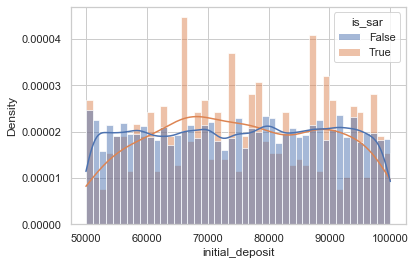

In [21]:
sns.histplot(data=bene_acct, x='initial_deposit', hue='is_sar',
             stat='density', common_norm=False, kde=True)


0        1969
1        6416
2        5072
3          38
4        7351
         ... 
88809    3929
88810    3909
88811    2418
88812    2977
88813    7053
Length: 88814, dtype: int16


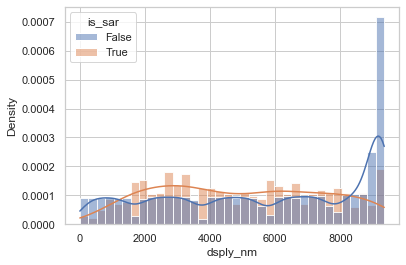

In [22]:
bene_acct['dsply_nm'] = bene_acct.dsply_nm.astype('category')
print(bene_acct['dsply_nm'].cat.codes)
bene_acct['dsply_nm'] = bene_acct['dsply_nm'].cat.codes
sns.histplot(data=bene_acct, x='dsply_nm', hue='is_sar',
             stat='density', common_norm=False, kde=True)


In [24]:
newtrans = pd.merge(transactions, accounts[['acct_id','branch_id','bank_id']], how='inner', left_on=['orig_acct'], right_on=['acct_id']).rename(columns = {'bank_id': 'orig_bank_id', 'branch_id': 'orig_branch_id'}).drop(columns = 'acct_id')
new2trans = pd.merge(newtrans, accounts[['acct_id','branch_id','bank_id']], how='inner', left_on=['bene_acct'], right_on=['acct_id']).rename(columns = {'bank_id': 'bene_bank_id', 'branch_id': 'bene_branch_id'}).drop(columns = 'acct_id')

In [26]:
new2trans

,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id,orig_branch_id,orig_bank_id,bene_branch_id,bene_bank_id
0,1,2910,559,TRANSFER,915.43,2017-01-01 00:00:00+00:00,False,-1,1,bank_1,1,bank_0
1,12857,2910,559,TRANSFER,102.97,2017-01-08 00:00:00+00:00,False,-1,1,bank_1,1,bank_0
2,26092,2910,559,TRANSFER,453.14,2017-01-15 00:00:00+00:00,False,-1,1,bank_1,1,bank_0
3,38224,2910,559,TRANSFER,558.24,2017-01-22 00:00:00+00:00,False,-1,1,bank_1,1,bank_0
4,49923,2910,559,TRANSFER,120.47,2017-01-29 00:00:00+00:00,False,-1,1,bank_1,1,bank_0
...,...,...,...,...,...,...,...,...,...,...,...,...
88809,49771,7144,1356,TRANSFER,566.29,2017-01-28 00:00:00+00:00,False,-1,1,bank_3,1,bank_0
88810,61133,7144,1356,TRANSFER,289.70,2017-02-04 00:00:00+00:00,False,-1,1,bank_3,1,bank_0
88811,73597,7144,1356,TRANSFER,583.22,2017-02-11 00:00:00+00:00,False,-1,1,bank_3,1,bank_0
88812,86749,7144,1356,TRANSFER,458.94,2017-02-18 00:00:00+00:00,False,-1,1,bank_3,1,bank_0


In [27]:
newaccounts = accounts.copy()
newaccounts.acct_id = np.tile(np.arange(len(accounts[accounts.bank_id == 'bank_' +str(1)])), 5)
mappingDict = {key: value for (key, value) in zip(accounts.acct_id, newaccounts.acct_id)}

In [32]:
new3trans = new2trans.replace({"orig_acct": mappingDict, "bene_acct": mappingDict})

In [39]:
# for i in range(5):
#     accounts[accounts.bank_id == 'bank_' +
#              str(i)].to_csv('accounts_' + str(i) + '.csv', index=False)
for i in range(5):
    newaccounts[newaccounts.bank_id == 'bank_' +
             str(i)].to_csv('accounts_' + str(i) + '.csv', index=False)


In [44]:
# for i in range(5):
    # transactions[transactions.orig_acct.isin(accounts.acct_id[accounts.bank_id == 'bank_' + str(i)]) | transactions.bene_acct.isin(accounts.acct_id[accounts.bank_id == 'bank_0' + str(i)])].to_csv('transactions_' + str(i) + '.csv', index = False)
for i in range(5):
    new3trans[(new3trans.orig_bank_id == 'bank_' + str(i)) | (new3trans.bene_bank_id == 'bank_' + str(i))].to_csv('transactions_' + str(i) + '.csv', index = False)